In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation

In [2]:
%%time

L=10
D=2
N=L**D
F=10
Q=4
ind=np.random.randint(Q,size=(N,F))

TN=100
T=1000
t=np.arange(T)
ok=False

aa=np.zeros((TN,L,L),dtype=int)

#fig, ax = plt.subplots(figsize=(4, 4))

for tnn in range(TN):
    for tn in t:
        a=np.random.randint(N)
        b1=np.random.randint(D*2)
        if b1==0: 
            if (a+1)%L==0:
                b=a+1-L
            else: b=a+1
        elif b1==1:
            if a%L==0:
                b=a-1+L
            else: b=a-1
        elif b1==2: b=a+L
        else: b=a-L
        b=b%N

        c=np.random.randint(F)
        if ind[a,c]==ind[b,c]:
            dd=np.random.randint(F)
            for Fi in range(F):
                d=(dd+Fi)%F
                if ind[a,d]!=ind[b,d]:
                    ind[a,d]=ind[b,d].copy()
                    break
                    
    aa[tnn]=np.reshape(ind[:,1],(L,L))
        
    
    #ax.pcolormesh(aa[tnn],cmap="bwr")
    #ax.title(str(tnn))
    #plt.show
        
    print('{}\r'.format(tnn), end="")
print()

99
CPU times: user 2.86 s, sys: 29.8 ms, total: 2.89 s
Wall time: 2.93 s


In [3]:
%matplotlib widget
from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation

'''try:
    plt.style.use('ggplot')
except:
    pass'''

animation_type = 'pcolor'

fig, ax = plt.subplots(figsize=(4, 4))
ax.set(xlim=(0, L-1), ylim=(0, L-1))
x=np.arange(L)
y=np.arange(L)
t=np.arange(1000)
X,Y,T=np.meshgrid(x, y, t)

        
if animation_type == 'pcolor':
    cax = ax.pcolormesh(x, y, aa[0,:-1, :-1], cmap='bwr')
    #fig.colorbar(cax)
def animate(i):
    cax.set_array(aa[i,:-1, :-1].flatten())
    
anim = FuncAnimation(fig, animate, frames=len(t)-1, repeat=False, interval=100)
fig.show()


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [51]:
mag=np.zeros((TN,F))
ind2=np.reshape(aa,(TN,N))
for tnn in range(TN):
    for Qi in range(Q):
        for i in range(N):
            if (ind2[tnn,i]+1)%(Qi+1)==0:
                mag[tnn,Qi]+=1
mag=mag/N

In [52]:
fig, ax1 = plt.subplots(figsize=(4, 4))
ax1.plot(mag)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [40]:
mag[999,:]

array([1.    , 0.4075, 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
       0.    , 0.    ])

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

fig = plt.figure(figsize=(5,5))
cax = ax.pcolormesh(x, y, aa[0,:-1, :-1])

ValueError: All blocks must animate for the same amount of time

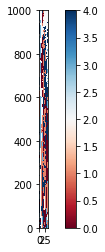

In [31]:
import animatplot as amp
t=np.arange(1000)

block = amp.blocks.Pcolormesh(aa, t_axis=2, cmap='RdBu')
plt.colorbar(block.quad)
plt.gca().set_aspect('equal')

anim = amp.Animation([block], amp.Timeline(t))

anim.controls()

anim.save_gif('pcolormesh')
plt.show()

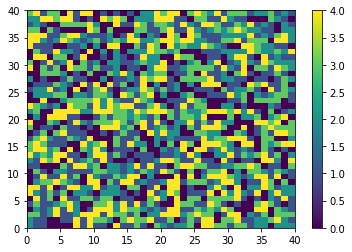

<Figure size 432x288 with 0 Axes>

In [25]:
ax = plt.subplot(111)

quad = plt.pcolormesh(aa[0])

plt.colorbar()

plt.ion()
plt.show()

for i in range(1000):
    z = aa[i]
    z = z[:-1, :-1]

    quad.set_array(z.ravel())
    #plt.title('Phase: %.2f'%phase)
    plt.draw()

plt.ioff()
plt.show()

In [275]:
aa=np.zeros((4,L,L),dtype=int)
for i in range(4):
    aa[i]=np.reshape(ind[:,i],(L,L))
print(aa[0])

[[ 7  7  7 ...  4  4  4]
 [ 4  4  5 ...  4  4  4]
 [ 4  4  5 ...  4  4  4]
 ...
 [ 7  7  7 ... 18 18  8]
 [ 8  7  7 ... 18 18  8]
 [ 7  7  7 ... 18 18  7]]


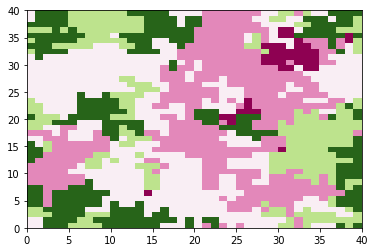

In [20]:
from matplotlib.colors import BoundaryNorm
from matplotlib.ticker import MaxNLocator
levels = MaxNLocator(nbins=15).tick_values(aa[0].min(), aa[0].max())
cmap = plt.get_cmap('PiYG')
norm = BoundaryNorm(levels, ncolors=cmap.N, clip=True)
fig, ax = plt.subplots()
ax.pcolormesh(aa[0],cmap=cmap, norm=norm)

In [4]:
def iniState(N,F,Q):
    return np.random.randint(Q,size=(N,F))

def AdD(D,L):
    # This function returns the sparse adjacency matrix of a d-dimensonal  
        # integer lattice with side L and the total number of elements N=L**d
    # Only for Periodic Boundary Conditions
    
    import scipy.sparse as ss
    N=L**D
    A=ss.dok_matrix((N,N),dtype=int)   # integer
    for i in range(N):
        for j in range(D):
            A[i,(i+L**j)%N] = 1
            A[i,(i-L**j)%N] = 1
    return A.copy()#.tocoo()

def chooseB(a,A):
    return A[a].nonzero()[1][np.random.randint(2*D)]
    



In [5]:
%%time

L=10
D=2
N=L**D
F=10
Q=4
ind=np.random.randint(Q,size=(N,F))

TN=1000
T=100
t=np.arange(T)
ok=False

aa=np.zeros((TN,L,L),dtype=int)

#fig, ax = plt.subplots(figsize=(4, 4))
A=AdD(D,L)
for tnn in range(TN):
    for tn in t:
        a=np.random.randint(N)
        b=chooseB(a,A)

        c=np.random.randint(F)
        if ind[a,c]==ind[b,c]:
            dd=np.random.randint(F)
            for Fi in range(F):
                d=(dd+Fi)%F
                if ind[a,d]!=ind[b,d]:
                    ind[a,d]=ind[b,d].copy()
                    
        
    print('{}\r'.format(tnn), end="")
print()

999
CPU times: user 17.5 s, sys: 1.2 s, total: 18.7 s
Wall time: 17.8 s
